## Inicjalizacja środowiska programistycznego

In [3]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Warstwa splotowa - ang. convlolution layer.

Standardowe sieci w pełni połączone mają bardzo dużo wag. Analiza obrazu o rozdzielczości 10M pikseli, wymaga 

$$
{\huge
(10M +1)\times N_\text{neuronów}
}
$$

wag już w pierwszej wartwie ukrytej. Taka duża liczba wag jest trudna w treningu - jest podatna na przetrenowania, co widać na przykładzie
zbnioru MNIST.

W 1998 roku zaproponowano architekturę z warstwami dzielącymi wagi - [LeNet](https://ieeexplore.ieee.org/document/726791).
Warstwy ze współdzielemien wag są obecnie nazywane warstawi splotowymi, ang. `convoliution layer`. Sieci wykorzystujące takie warstwy to 
sieci konwolucyjne, ang. `convolution neural network, CNN`

Źródło rysunków: [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)

- **jądro, ang. `kernel/filter`** - zbiór wag wspólny dla calego obrazu. Jądro zwykle ma podstać macierzy kwadratowej.

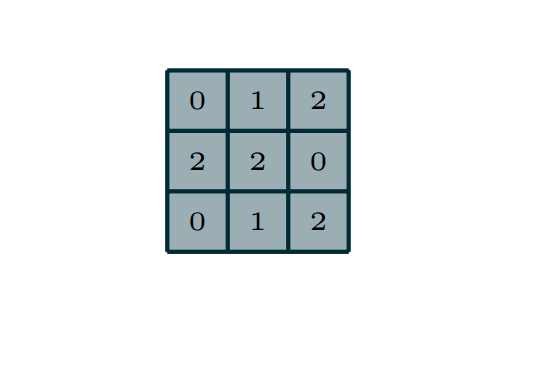

- **pole recepcyjne** - obszar objęty zbiorem różnych wag. Pole recepcyjne przesuwa się po obrazie

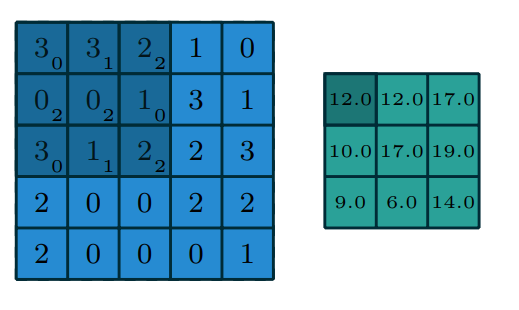

* **krok, ang. stride** - liczba indeksów o jakie przesuwa się pole recepcyjne. Tutaj `stride=1`

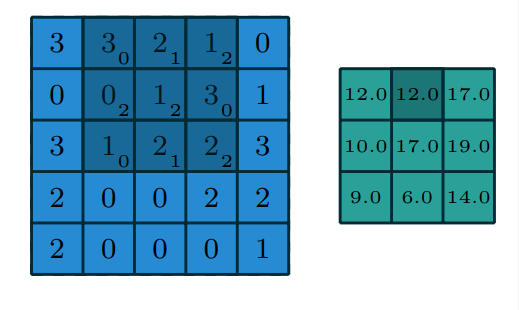


* **wypełnienie, ang. padding** - sposób rozszerzenia obrazu w celu uzyskania pożadanego kształtu wyniku warsty konwolucyjnej, np. zachowania tego samego kształtu dla kolejnych warstw konwolucyjnych. Tutaj: wypełnienie zerami, ang. `zero padding`.

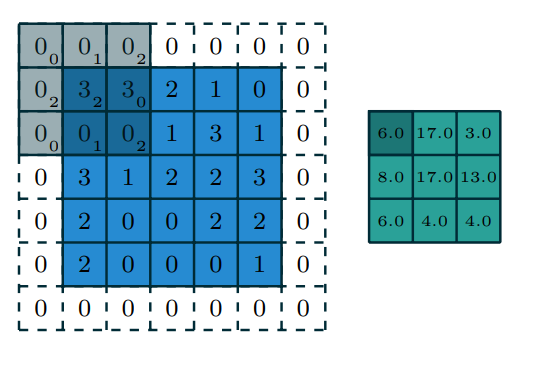


* **dylatacja** - odstęp między elementami pola recepcyjnego. Odstęp  wynosi `d-1` - czyli brak odstępu odpowiada `n=1`

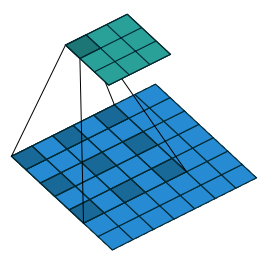

Interfejs użytkownika warsty kowolucyjnej w Keras:

```Python
tf.keras.layers.Conv2D(
    filters,                    #liczba filtrów
    kernel_size,                #rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),             # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopelnienia: 
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach
    data_format=None,           # specyfikacja znaczenia wymiarów: 
                                # "channels_first" - (batch size, #kanałów, W, H)
                                # "channels_last" - (batch size, W, H, #kanałów) <-- domyślne w TF
    dilation_rate=(1, 1),       # dylatacja (n,m) - splot bierze co (n-1, m-1) element w polu recepcyjnym 
    groups=1,                   # liczebność grup kanałów, które są ananalizowane wspólnymi wagami.
)
```

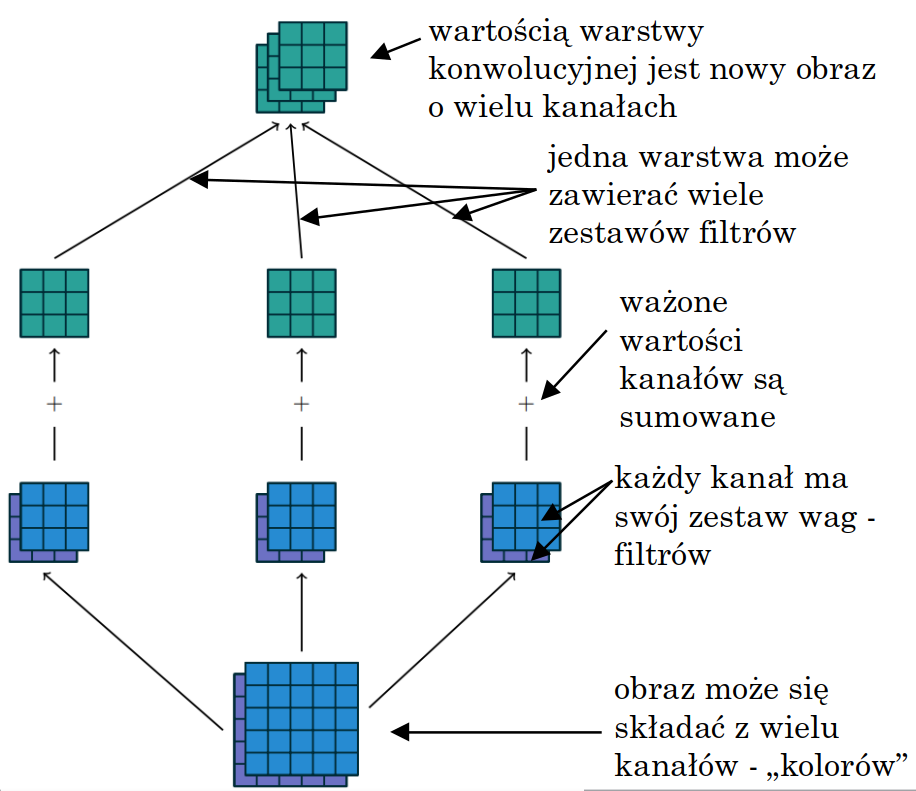

# Przygotowanie danych

**Proszę:**

* wywołać funkcje ładującą dane i rysującą rysunki korzystając z modułu `emnist_functions`

In [5]:
!pip install idx2numpy

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=5e00fc24b11fb73ad7e0cd92ab22bc787d0e0c66abc9defab57e18353497f3bc
  Stored in directory: /home/akalinow/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


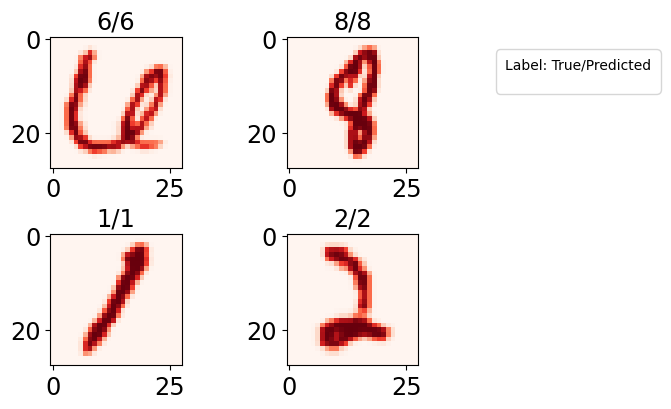

In [7]:
#BEGIN_SOLUTION
datasetName = "emnist-digits-train"
datasetPath = "/scratch_hdd/akalinow/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
emnist_fcn.plotMNIST(x, y, y)
#END_SOLUTION
pass